# Line charts

This example shows how line charts can be used to visualize the number of times each value occurs ("value counts") in a discrete, numerical variable.

## Includes: viz_data_quality and other libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from vizdataquality import plot as vdqp

In [2]:
mpl.style.use('tableau-colorblind10')

## Create a data series containing the value counts

The is real data from Leeds' Meadow Lane car park in April 2017, and comes from Open Data provided on https://datamillnorth.org/ under the Open Government Licence (https://www.nationalarchives.gov.uk/doc/open-government-licence/version/3/)

The index is the day of the month, and the data are the number of parking fines that were issued on that day.

In [3]:
value_counts = pd.Series(data=[5, 2, 4, 3, 1, 1, 4, 4, 3, 4, 4, 1, 7, 1, 1, 2, 1, 2, 2, 1, 2, 4, 4],
                         index=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 19, 20, 22, 23, 25, 26, 27, 28, 29, 30])

## Visualize the value counts

By default, the chart shows any gaps in the sequence of X-axis values:
- Day 15 is shown as a point because there are no values either side of it
- The rest of the chart is shown as four separate lines because no fines were issued on the 21st or 24th April

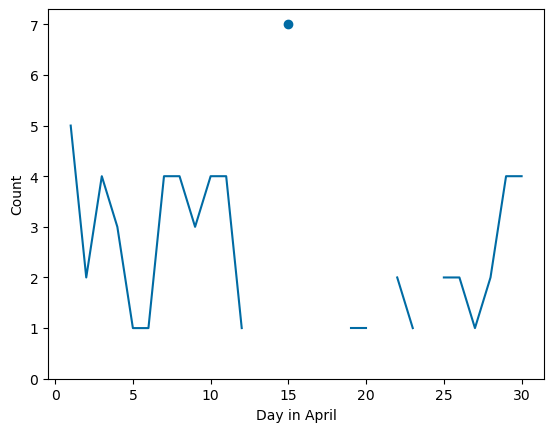

In [4]:
ax_kw = {'xlabel': 'Day in April', 'ylabel': 'Count', 'ylim': 0}
vdqp.line(value_counts, ax_kw=ax_kw)

## Customise the visualization

Parameters such as marker shapes and colours may be specified via keyword arguments.

The option 'show missing' inserts zero counts for any X-axis values that were missing.

The option 'interpolate' is like a normal line chart (i.e., drawing a line that connects the supplied data points), but that is misleading for value counts because it implies that there were fines on seven days that had zero.

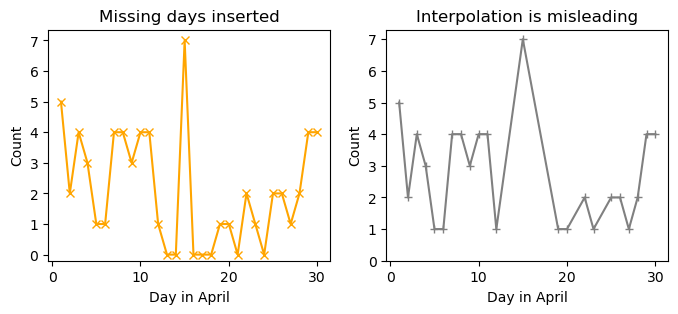

In [5]:
fig, ax = plt.subplots(1, 2)
fig_kw = {'size_inches': (8, 3)}
fig.set(**fig_kw)

ax_kw['title'] = 'Missing days inserted'
ax_kw['ylim'] = -0.2
vdqp.line(value_counts, option='show missing', ax_input=ax[0], ax_kw=ax_kw, marker='x', color='orange')

ax_kw['title'] = 'Interpolation is misleading'
ax_kw['ylim'] = 0
vdqp.line(value_counts, option='interpolate', ax_input=ax[1], ax_kw=ax_kw, marker='+', color='grey')

plt.show()